# Проект: Исследование стартапов

- Автор: Лазарева Елизавета Сергеевна
- Дата: 25.03.2025

## Введение

### Цели и задачи проекта
**Цель**: Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


**Задачи**: 

Принять решения:
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.


## 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* `acquisition.csv`
* `company_and_rounds.csv`
* `people.csv`
* `education.csv`
* `degrees.csv`

Опциональные датасеты:
* `fund.csv`
* `investment.csv`


### 1.1. Вывод общей информации, исправление названия столбцов

Загрузим необходимые библиотеки и данные о стартапах. Затем выведем основную информацию о данных и первые пять строк датафреймов. При необходимости приведем названия столбцов к стилю snake case.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [2]:
# Выгрузим данные


In [3]:
# Выгрузим первые пять строк датафрейма acquisition
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выгрузим первые пять строк датафрейма company_and_rounds
pd.set_option('display.max_columns', 500)
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для датафрейма company_and_rounds необходимо привести названия столбцов к стилю snace case. В датафрейме присутствуют дублирующиеся столбцы `company ID` и `company id`. Чтобы избежать полного дублирования в названии столбцов и в дальнейшем было удобно работать с данными, добавим цифру 1 в название столбца `company ID` и цифру 2 в название столбца `company id`, затем приведем названия к стилю snace case.   

In [5]:
# Добавим цифру 2 к названию столбца company id
company_and_rounds = company_and_rounds.rename(columns = {'company  ID':'company_id_1', 'company  id':'company_id_2'})
company_and_rounds.columns = company_and_rounds.columns.str.lower().str.replace('  ','_')

In [6]:
company_and_rounds.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [7]:
# Выгрузим первые пять строк датафрейма people
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [8]:
# Выгрузим первые пять строк датафрейма education
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [9]:
# Выгрузим первые пять строк датафрейма degrees
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Для каждого датафрейма, в котором есть столбец `id`, переименуем его, добавив к нему название датафрейма. Это нужно для того, чтобы при дальнейшем присоединении датафреймов, не возникало путаницы.

In [10]:
# Переименуем столбец для датафрейма acquisition
acquisition = acquisition.rename(columns = {'id':'acquisition_id'})
# Переименуем столбец для датафрейма people
people = people.rename(columns = {'id':'people_id'})
# Переименуем столбец для датафрейма education
education = education.rename(columns = {'id':'education_id'})
# Переименуем столбец для датафрейма degrees
degrees = degrees.rename(columns = {'id':'degrees_id'})

### 1.2. Смена типов и анализ пропусков

Выведем основную информацию о каждом датафрейме, сумму и процент пропусков, при необходимости изменим типы данных в столбцах.


In [11]:
# Выведем информациюю о датафрейме acquisition
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   acquisition_id        9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [12]:
# Посчитаем сумму пропусков в датафрейме
acquisition.isna().sum().sort_values(ascending = False)

term_code               7576
acquired_at               29
acquisition_id             0
acquiring_company_id       0
acquired_company_id        0
price_amount               0
dtype: int64

In [13]:
# Посчитаем процент пропусков в датафрейме
acquisition.isna().mean().sort_values(ascending = False) * 100

term_code               80.535771
acquired_at              0.308281
acquisition_id           0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
price_amount             0.000000
dtype: float64

Датафрейм `acquisition` содержит 9407 строк и 6 столбцов.

- Столбец `term_code` содержит 7576 пропусков(80.5%).
- Столбец `acquired_at` содержит 29 пропусков(0.3%).
- Столбец `acquired_at` хранит значение даты, поэтому рекомендуется заменить тип  `object` на тип `datetime`.

In [14]:
# Заменим тип данных в столбце acquires_at 
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

In [15]:
# Выведем информациюю о датафрейме company_and_rounds
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_1         217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_2         52928 non-null   float64
 15  funded_at        

In [16]:
# Посчитаем сумму пропусков в датафрейме
company_and_rounds.isna().sum().sort_values(ascending = False)

closed_at              214325
funded_at              165094
is_last_round          164846
funding_round_type     164846
is_first_round         164846
participants           164846
pre_money_valuation    164846
raised_amount          164846
funding_round_id       164846
company_id_2           164846
network_username       122240
country_code           109167
founded_at             107818
category_code           73888
domain                  70615
name                      303
company_id_1              302
milestones                302
funding_rounds            302
investment_rounds         302
status                    302
funding_total             302
dtype: int64

In [17]:
# Посчитаем процент пропусков в датафрейме
company_and_rounds.isna().mean().sort_values(ascending = False) * 100

closed_at              98.416248
funded_at              75.809784
is_last_round          75.695905
funding_round_type     75.695905
is_first_round         75.695905
participants           75.695905
pre_money_valuation    75.695905
raised_amount          75.695905
funding_round_id       75.695905
company_id_2           75.695905
network_username       56.131586
country_code           50.128574
founded_at             49.509124
category_code          33.928752
domain                 32.425818
name                    0.139135
company_id_1            0.138676
milestones              0.138676
funding_rounds          0.138676
investment_rounds       0.138676
status                  0.138676
funding_total           0.138676
dtype: float64

В датафрейме `company_and_rounds` 217774 строк и 22 столбца.
- Столбец `closed_at` содержит 214325 пропусков(98.4%)
- Столбец `funded_at` содержит 165094 пропуска(75.8%)
- Столбцы `is_last_round`, `funding_round_type`, `is_first_round`, `participants`, `pre_money_valuation`, `raised_amount`, `funding_round_id`, `company_id_2` содержат 164846 пропусков(75.69%)
- Столбец `network_username` содержит 122240 пропусков (56.13%)
- Столбец `country_code` содержит 109167 пропусков (50.13%)
- Столбец `founded_at` содержит 107818 пропусков (49.51%)
- Столбец `category_code` содержит 73888 пропусков (33.93%)
- Столбец `domain` содержит 70615 пропусков (32.43%)
- Столбец `name` содержит 303 пропуска (0.14%)
- Столбцы `company_id_1`, `milestones`, `funding_rounds`, `investment_rounds`, `status`, `funding_total` содержит 302 пропуска (0.14%)
Все столбцы датафрейма содержат пропуски.

Столбцы `closed_at`, `founded_at` и `funded_at` хранят значение даты, поэтому рекомендуется заменить тип  `object` на тип `datetime`.

In [18]:
# Заменим тип данных в столбцах closed_at, founded_at, funded_at
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'])
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

In [19]:
# Выведем информациюю о датафрейме people
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   people_id         226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [20]:
# Посчитаем сумму пропусков в датафрейме
people.isna().sum().sort_values(ascending = False)

company_id          192094
network_username    187842
first_name               9
last_name                4
people_id                0
dtype: int64

In [21]:
# Посчитаем процент пропусков в датафрейме
people.isna().mean().sort_values(ascending = False) * 100

company_id          84.731528
network_username    82.855996
first_name           0.003970
last_name            0.001764
people_id            0.000000
dtype: float64

Датафрейм `people` содержит 226709 строк  и 5 столбцов.

- Столбец `company_id` содержит 192094 пропуска(84.7%)
- Столбец `network_username` содержит 187842 пропуска(82.8%)
- Столбцы `first_name`, `last_name` содержат 9 и 4 пропуска соответственно(0.003% и 0.002%)

Все типы данных соответствуют содержащимся в датафрейме данным.

In [22]:
# Выведем информациюю о датафрейме education
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education_id  109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [23]:
# Посчитаем сумму пропусков в датафрейме
education.isna().sum().sort_values(ascending = False)

graduated_at    51556
instituition       55
education_id        0
person_id           0
dtype: int64

In [24]:
# Посчитаем процент пропусков в датафрейме
education.isna().mean().sort_values(ascending = False) * 100

graduated_at    47.035854
instituition     0.050178
education_id     0.000000
person_id        0.000000
dtype: float64

Датафрейм `education` содержит 109610 строк  и 4 столбцa.

- Столбец `graduated_at` содержит 51556 пропусков(47%)
- Столбец `instituition` содержит 55 пропусков(0.05%)

Столбец `graduated_at` хранит значение даты, поэтому рекомендуется заменить тип  `object` на тип `datetime`.

In [25]:
# Заменим тип данных в столбце graduated_at 
education['graduated_at'] = pd.to_datetime(education['graduated_at'])

In [26]:
# Выведем информациюю о датафрейме degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   degrees_id   109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [27]:
# Посчитаем сумму пропусков в датафрейме
degrees.isna().sum().sort_values(ascending = False)

subject        28312
degree_type    11221
degrees_id         0
object_id          0
dtype: int64

In [28]:
# Посчитаем процент пропусков в датафрейме
degrees.isna().mean().sort_values(ascending = False) * 100

subject        25.829760
degree_type    10.237205
degrees_id      0.000000
object_id       0.000000
dtype: float64

Датафрейм `degrees` содержит 109610 строк  и 4 столбца.

- Столбец `subject` содержит 28312 пропусков(25.8%)
- Столбец `degree_type` содержит 11221 пропуск(10.2%)

Все типы данных соответствуют содержащимся в датафрейме данным.

**Промежуточный вывод:** 
- Во всех датафреймах для строк, хранящих информацию о дате, был изменен тип данных на `datetime`.
- В каждом из представленных датафреймов присутствуют пропуски в большом количестве. В датафреймах `aquisition`, `company_and_rounds`, `people` есть столбцы с более `80%` пропусков. Такое количество пропусков может помешать дальнейшему анализу данных или снизить его качество.

## 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

- Составим сводную таблицу по годамна основе датасета `company_and_rounds.csv`, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных необходимо ответить на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Создадим сводную таблицу. Для этого выделим год из `founded_at`, сгруппируем данные по годам, расчитаем медиану `raised_amount` и количество рандов. Отфильтруем годы с количеством раундов больше 50. Создадим столбец с размером финансирования в миллионах.

In [29]:
# Преобразование даты и извлечение года
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

# Группировка по годам
summary = company_and_rounds.groupby('year')['raised_amount'].agg(
    typical_amount=('median'),
    total_rounds=('count')
).reset_index()

# Фильтрация (только годы с >50 раундами)
summary = summary[summary['total_rounds'] > 50]

# Сортировка по году
summary = summary.sort_values('year').reset_index(drop=True)
# Создание столбца с размером финансирования в миллионах
summary['m_typical_amount'] = summary['typical_amount'] / 1000000

summary

,year,typical_amount,total_rounds,m_typical_amount
0,1999.0,2000000.0,76,2.00000
1,2000.0,4200000.0,125,4.20000
2,2001.0,3000000.0,96,3.00000
3,2002.0,4200000.0,116,4.20000
4,2003.0,3000000.0,159,3.00000
5,2004.0,5000000.0,291,5.00000
6,2005.0,5500000.0,1633,5.50000
7,2006.0,5000000.0,2436,5.00000
8,2007.0,3973320.0,3279,3.97332
9,2008.0,3110000.0,3774,3.11000


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

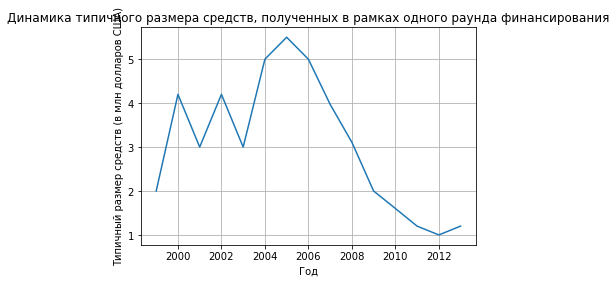

In [30]:
# Построение графика

summary.plot(
    kind='line',
    x='year',
    y='m_typical_amount',
    title='Динамика типичного размера средств, полученных в рамках одного раунда финансирования',
    legend = False
)

# Подписываем и отображаем график
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (в млн долларов США)')
plt.grid()
plt.show()

На основе полученных данных можно сделать выводы:
- Типичный размер собранных в рамках одного раунда средств был максимальным в 2005 году и составил 5.5 миллионов.
- В 2013 году было самое высокое количество раундов (11072), однако размер средств был одним из самых низких - 1.2 миллиона


### 2.2. Люди и их образование

Необходимо понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.


Для проведения анализа объединим датафреймы `people` и `education` по полям `people_id` для `people` и `person_id` для `education`. Будем использовать тип соединения `outer`, поскольку в данных много пропусков и важно сохранить всю информацию.

К этим датафреймам невозможно присоединить датафрейм `degrees`, хоть он имеет поле `object_id`, имеющее похожие значения, однако в этом поле содержатся строковые значения, в отличие от полей `people_id` и `person_id`. 

In [31]:
# Соединим датафреймы people и education
people_education = people.merge(education, left_on = 'people_id', right_on = 'person_id', how = 'outer')

In [32]:
# Выведем информацию о полученном датафрейме
people_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268248 entries, 0 to 268247
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   people_id         267694 non-null  float64       
 1   first_name        267685 non-null  object        
 2   last_name         267690 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   education_id      109610 non-null  float64       
 6   person_id         109610 non-null  float64       
 7   instituition      109555 non-null  object        
 8   graduated_at      58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 18.4+ MB


Для удобства в дальнейшем исследовании объединим столбцы `people_id` и `person_id`.

In [33]:
# Создадим столбец total_people_id
people_education['total_people_id'] = people_education['people_id'].fillna(people_education['person_id'])

 Проверим столбец `total_people_id` на наличие дубликатов, найдем сумму дубликатов и удалим их.

In [34]:
# Найдем сумму дубликатов
people_education.duplicated(subset = ['total_people_id']).sum()

41160

In [35]:
# Удалим дубликаты
people_education = people_education.drop_duplicates(subset = ['total_people_id'])

Для того, чтобы разделить компании на группы по количеству работников, найдем все уникальные значения для количества сотрудников в компании, а также сколько раз встречается это значение.

In [36]:
# Сгруппируем датафрейм по company_id и посчитаем количество сотрудников в каждой компании
employees = people_education.groupby('company_id')['total_people_id'].agg(people_count = 'count').reset_index()
# Найдем, сколько раз встречаются все значения количества сотрудников
employees.groupby('people_count')['company_id'].count()

people_count
1      18116
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
10        25
11        30
12        16
13        17
14         8
15         3
16         4
17         5
18         3
19         3
20         3
21         2
22         2
23         3
25         2
26         1
29         2
31         1
32         1
35         1
36         1
39         1
47         1
48         1
51         1
56         2
61         1
63         1
72         1
138        1
150        1
244        1
Name: company_id, dtype: int64

Исходя из полученных данных, компании будет логичнее всего разделить на категории так:
1. 1 сотрудник;
2. 2-5 сотрудников;
3. 6-13 сотрудников;
4. более 14 сотрудников.

Для того, чтобы оценить, насколько информация об образовании сотрудников полна, добавим разделение по размеру компании к `employees`, затем посчитаем количество сотрудников без образования в `people_education`, и посчитаем долю таких сотрудников для каждой категории компании.

In [37]:
# Разделим компании на группы по размеру
employees['size_group'] = pd.cut(employees['people_count'], 
                                 bins = [0, 1, 5, 13, float('inf')], labels = ['1 сотрудник', '2-5 сотрудников', '6-13 сотрудников',
                                                                     'более 14 сотрудников'])

In [38]:
# Считаем количество сотрудников без данных об образовании
no_education = people_education[people_education['instituition'].isna()].groupby('company_id')['total_people_id'].agg(no_education = 'count').reset_index()
no_education

,company_id,no_education
0,1.0,1
1,3.0,1
2,4.0,1
3,5.0,16
4,8.0,3
...,...,...
11877,285409.0,1
11878,285446.0,1
11879,285953.0,1
11880,285972.0,1


Объединим `employees` и `no_education` по полю `company_id`, используя левый тип соединения

In [39]:
# Объединяем employees с no_education 
stats = employees.merge(no_education, on = 'company_id', how = 'left').fillna({'no_education': 0})

In [40]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22921 entries, 0 to 22920
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   company_id    22921 non-null  float64 
 1   people_count  22921 non-null  int64   
 2   size_group    22921 non-null  category
 3   no_education  22921 non-null  float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 559.9 KB


In [41]:
# Считаем дюлю сотрудников без информации об образовании
stats['no_education_ratio'] = stats['no_education'] / stats['people_count']

In [42]:
stats

,company_id,people_count,size_group,no_education,no_education_ratio
0,1.0,2,2-5 сотрудников,1.0,0.500000
1,2.0,1,1 сотрудник,0.0,0.000000
2,3.0,3,2-5 сотрудников,1.0,0.333333
3,4.0,13,6-13 сотрудников,1.0,0.076923
4,5.0,61,более 14 сотрудников,16.0,0.262295
...,...,...,...,...,...
22916,285897.0,2,2-5 сотрудников,0.0,0.000000
22917,285953.0,1,1 сотрудник,1.0,1.000000
22918,285972.0,2,2-5 сотрудников,1.0,0.500000
22919,285996.0,1,1 сотрудник,0.0,0.000000


In [43]:
# Считаем среднюю долю сотрудников без информации об образовании для каждой категории компании
stats.groupby('size_group', observed = False)['no_education_ratio'].agg(mean_no_education_ratio = 'mean')

,mean_no_education_ratio
size_group,
1 сотрудник,0.463127
2-5 сотрудников,0.476357
6-13 сотрудников,0.521643
более 14 сотрудников,0.392665


Из полученных данных можно сделать вывод, что размер компании не влияет на полноту информации об образовании сотрудников. Больше всего пропусков в данных у компаний с 6-13 сотрудниками(52%), меньше всего у компаний с более, чем 14 сотрудниками(39%). Для 1 и 2-5 сотрудников значения примерно одинаковы.

### 2.3. Объединение датасетов

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Необходимо установить, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Необходимо оценить, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в датасетах `people` и `company_and_rounds`. Из описания данных понятно, что в датафрейме `people` данный столбец принимает значения ника сотрудника в сети, в то время как в датафрейме `company_and_rounds` столбец принимает значение компании в сети. Это значит, что данные столбцы при одинаковом названии имеют разные значения. Проверим это и выведем первые 10 значений для каждого столбца, которые не содержат пропусков.

In [44]:
# Отберем значения столбца без пропусков и выведем первые 10 строк датафрейма
people_notna = people[people['network_username'].notna()]
people_notna.head(10)

,people_id,first_name,last_name,company_id,network_username
6,100006,Courtney,Homer,81558.0,jobsbostontech
8,100010,Michael,Dadashyan,NaN,fbroulette
16,100018,Adam,Beckerman,148554.0,adam_beckerman
17,100019,Melissa,French,NaN,netcastles
18,100022,OÄuz KaÄan,Aslan,NaN,OguzKaganAslan
19,100023,Neil,Chandran,81571.0,neilchandran
23,100027,Suraj,Shinde,NaN,SurajBShinde
26,100031,Sandeep,Hegde,81576.0,sandeephegde
27,100032,Dejan,Avramovic,NaN,avramavram
29,100034,Anand,Mistry,NaN,AnandHMistry


In [45]:
# Отберем только значения столбца без пропусков
comp_notna = company_and_rounds[company_and_rounds['network_username'].notna()]
# Для удобства выведем только название компании и ник
comp_notna[['name', 'network_username']].head(10)

,name,network_username
0,Wetpaint,BachelrWetpaint
1,Wetpaint,BachelrWetpaint
2,Wetpaint,BachelrWetpaint
9,HostNine,Hostnine
11,Vetter Idea Management System,getvetter
12,ChatRandom,chatrandom
15,FriendFeed,friendfeed
19,The Adory,the_adory
20,Mobclix,mobclix
21,Fitbit,fitbit


Проанализируем, что даст объединение `people` и `company_rounds` по `network_username`, и наглядно визуализируем пересечение данных.

In [46]:
# Получаем уникальные значения из каждого датафрейма
people_usernames = set(people['network_username'].dropna())
company_usernames = set(company_and_rounds['network_username'].dropna())
# Анализируем пересечение
intersection = people_usernames & company_usernames
print(f"Общих значений: {len(intersection)}")
print(f"Уникальных ников сотрудников: {len(people_usernames - company_usernames)}")
print(f"Уникальных названий компаний: {len(company_usernames - people_usernames)}")

Общих значений: 2199
Уникальных ников сотрудников: 36222
Уникальных названий компаний: 77372


Визуализация диаграммой Венна:

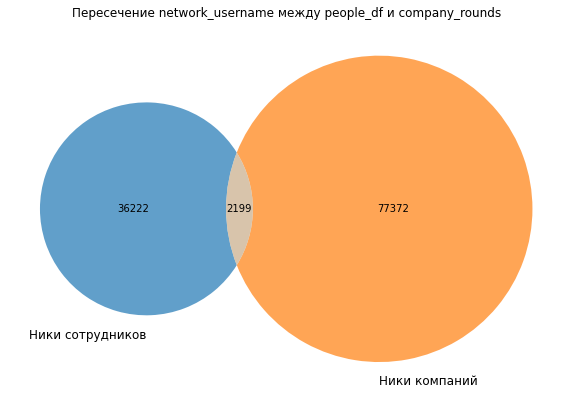

In [47]:
# Строим визуализацию
plt.figure(figsize=(10, 7))
venn2(
    [people_usernames, company_usernames],
    set_labels=('Ники сотрудников', 'Ники компаний'),
    set_colors=('#1f77b4', '#ff7f0e'),
    alpha=0.7
)
plt.title("Пересечение network_username между people_df и company_rounds")
plt.show()

Из визуализации видно, что совпадения есть, но их очень мало. Такие совпадения могут быть ошибкой, например, ник сотрудника совпадает с ником компании, или это просто ошибка или опечатка в заполнении данных. Соединение датасетов по этому полю приведет к некорректным сопоставлениям, а также не даст новой информации, так как поля имеют разную сущность.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. 

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

В датафрейме `company_and_rounds` можно заметить несколько дублирующихся столбцов:
- `company ID` и `company id`(для удобства были переименованы в `company_id_1` и `company_id_2`) содержат информацию об идентификаторе компании.
- `funding_total` и `raised_amount`, несмотря на разные названия, оба содержат информацию о сумме финансирования.
Это может говорить о том, что сначала данные хранили в одном столбце, а спустя время по какой-то причине начали хранить в другом. Проверим, так ли это. Для этого выведем количество совпадений для данных столбцов.

In [48]:
# Выведем информацию о датасете
company_and_rounds[['company_id_1', 'company_id_2', 'funding_total', 'raised_amount']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   company_id_1   217472 non-null  float64
 1   company_id_2   52928 non-null   float64
 2   funding_total  217472 non-null  float64
 3   raised_amount  52928 non-null   float64
dtypes: float64(4)
memory usage: 6.6 MB


In [49]:
# Выведем сумму совпадений для company_id_1 и company_id_2
(company_and_rounds['company_id_1'] == company_and_rounds['company_id_2']).sum()

52626

In [50]:
# Выведем сумму совпадений для funding_total и raised_amount
(company_and_rounds['funding_total'] == company_and_rounds['raised_amount']).sum()

22035

Для `company_id_1` и `company_id_2` количество совпадений равно количеству значений в столбце `company_id_2`. Из этого можно сделать вывод, что эти столбцы дублируют друг друга. Значит, можно заполнить часть пропусков в `company_id_1` с помощью `company_id_2`. Для `funding_total` и `raised_amount` совпадений меньше, чем в любом из столбцов, значит, эти данные не дублируются полностью, и заполнить один столбец другим не получится.

In [51]:
# Заполним пропуски в company_id_1
company_and_rounds['company_id_1'] = company_and_rounds['company_id_1'].fillna(company_and_rounds['company_id_2'])

In [52]:
# Проверяем количество пропусков
company_and_rounds.isna().sum().sort_values()

company_id_1                0
milestones                302
funding_rounds            302
investment_rounds         302
funding_total             302
status                    302
name                      303
domain                  70615
category_code           73888
founded_at             107818
country_code           109167
network_username       122240
funding_round_id       164846
is_last_round          164846
company_id_2           164846
is_first_round         164846
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
year                   165094
funded_at              165094
closed_at              214325
dtype: int64

Теперь в  столбце `company_id_1` нет пропусков. Удалим дублирующийся столбец.

In [53]:
# Удалим дублирущийся столбец company_id_2
company_and_rounds = company_and_rounds.drop('company_id_2', axis = 1)

In [54]:
company_and_rounds.columns

Index(['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round', 'year'],
      dtype='object')

Теперь приведем датафрейм `company_and_rounds` в удобный для дальнейшего анализа вид. Из структуры датафрейма можно сделать вывод, что данная таблица была получена из двух меньших таблиц, одна из них хранила информацию о компаниях, другая о раундах. 

Так как нам необходима информация для дальнейшего анализа в разрезе компаний, сделаем из датафрейма два меньших датафрейма:
- Датафрейм `company` с информацией о компаниях и со следующими столбцами:
   - `company_id_1`
   - `name` 
   - `category_code` 
   - `status`
   - `founded_at` 
   - `closed_at`  
   - `domain`  
   - `network_username` 
   - `country_code`  
   - `investment_rounds` 
   - `funding_rounds` 
   - `funding_total` 
   - `milestones`  
   
- Датафрейм `rounds` c информацией о раундах и со следующими столбцами:
   - `company_id_1`
   - `funding_round_id`
   - `funded_at`
   - `funding_round_type`
   - `raised_amount`
   - `pre_money_valuation`
   - `participants`
   - `is_first_round`
   - `is_last_round`

In [55]:
# Создадим датафрейм company
company = company_and_rounds[['company_id_1', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']]
# Создадим датафрейм rounds
rounds = company_and_rounds[['company_id_1', 'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round', 'year']]

Теперь удалим дубликаты из датафреймов

In [56]:
# Посчитаем сумму дубликатов в company
company.duplicated().sum()

20989

In [57]:
# Удалим дубликаты
company = company.drop_duplicates()

In [58]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196785 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_1       196785 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

In [59]:
# Посчитаем дубликаты в rounds
rounds.duplicated().sum()

0

**Промежуточные выводы**

Во время предварительного исследования было выполнено следующее:
1. На основе датафрейма `company_and_rounds` были построены сводная таблица и график и получены следующие выводы:
   - Типичный размер собранных в рамках одного раунда средств был максимальным в 2005 году и составил 5.5 миллионов.
   - В 2013 году было самое высокое количество раундов (11072), однако размер средств был одним из самых низких - 1.2 миллиона.
2. Размер компании не влияет на полноту данных об образовании сотрудников. Больше всего пропусков в данных у компаний с 6-13 сотрудниками(52%), меньше всего у компаний с более, чем 14 сотрудниками(39%). Для 1 и 2-5 сотрудников значения примерно одинаковы.
3. Датафреймы `people` и `company_and_rounds` невозможно объединить по столбцу `network_username`, поскольку в этих столбцах в разных датафреймах хранится разная по смыслу информация.
4. В датафрейме `company_and_rounds` были заполнены пропуски в столбце `company_id_1` с помощью дублирующегос столбцов. Дублирующийся столбец был удален.
5. Датафрейм `company_and_rounds` был разделен на датафреймы `company` и `rounds` для дальнейшего анализа. В датафрейме `company` было обранужено и удалено 20989 дубликатов. 


## 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных


Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

Для ответа на вопросы заказчика подготовим датафрейм `company` и отберем только данные по указанным параметрам: компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`

In [60]:
# Условия для фильтрации
conditions = ((company['funding_rounds']>0) | (company['investment_rounds']>0) | (company['status'] == 'acquired'))
# Создаем датафрейм с выполненными условиями 
company_filtred = company[conditions].copy()

In [61]:
company_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_1       40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.4+ MB

Мы получили датафрейм с 40747 компаниями, отобранными по заданным параметрам.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.


Для удобства работы со столбцом `funding_total`, создадим дополнительный столбец `funding_total_m`, который будет содержать значение в миллионах долларов.

In [62]:
# Создаем столбец funding_total_m
company_filtred['funding_total_m'] = company_filtred['funding_total'] / 1000000

In [63]:
# Изучим распределение значений в столбце
company_filtred['funding_total_m'].describe()

count    40747.00000
mean        10.13561
std         56.46436
min          0.00000
25%          0.00000
50%          0.60000
75%          5.65065
max       5700.00000
Name: funding_total_m, dtype: float64

Из полученных данных можно сделать вывод, что в данных присутствуют выбросы.
- Среднее значение равно 10.1 млн долларов и сильно отличается от медианы, которая равна 0.6 млн, скорее всего оно завышено выбросами.
- 25% компаний не получили финансирования, 75% компаний получили меньше 5.65 млн.
- Максимальное значение равно 5700 млн долларов, и это явный выброс.
- Стандартное отклонение равно 56 млн, что говорит о высоком разбросе значений.

Построим гистограмму распределения значений и диаграмму размаха.

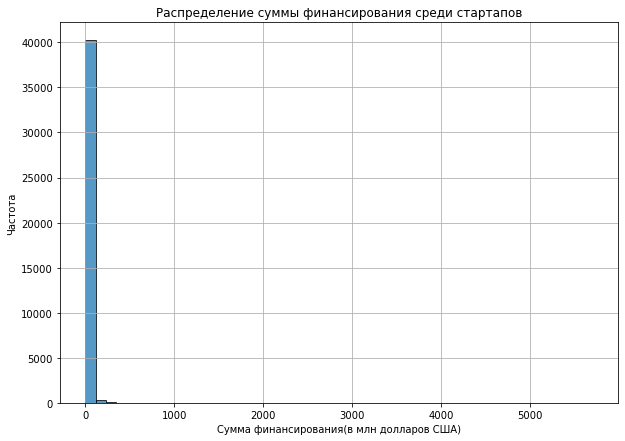

In [64]:
# Построим гистограмму
plt.figure(figsize=(10, 7))

company_filtred['funding_total_m'].plot(kind = 'hist', 
                                       bins = 50,
                                       alpha = 0.75,
                                       edgecolor = 'k',
                                       rot = 0)
plt.title('Распределение суммы финансирования среди стартапов')
plt.xlabel('Сумма финансирования(в млн долларов США)')
plt.ylabel('Частота')
plt.grid()
plt.show()

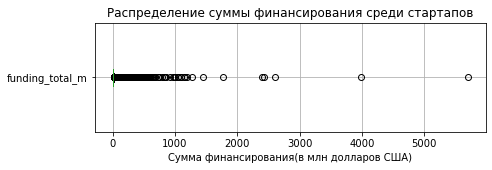

In [65]:
# Строим диаграмму размаха значений 
plt.figure(figsize=(7, 2))


company_filtred.boxplot(column='funding_total_m', vert=False)

plt.title('Распределение суммы финансирования среди стартапов')
plt.xlabel('Сумма финансирования(в млн долларов США)')

plt.show()

Так как заказчика интересует типичный размер финансирования, построим гистограмму и диаграмму размаха, исключив из данных стартапы, не получавшие финансирование. Также ограничим значение суммы финансирования до 50 млн, поскольку график, включающий все выбросы и аномальные значения неинформативен, ведь большинство значений сливаются в одну линию у нуля.

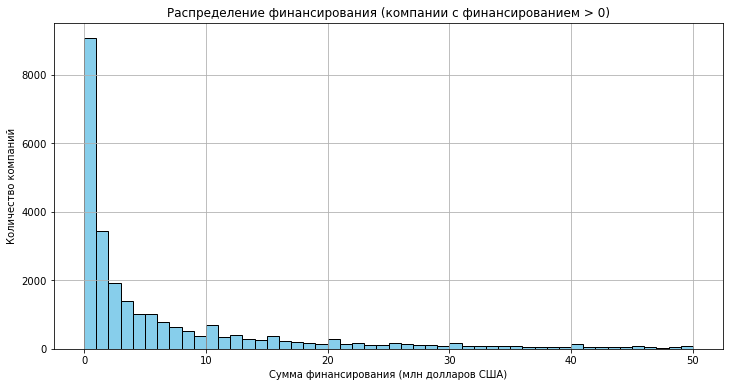

In [66]:
# Фильтрация данных
funded = company_filtred[company_filtred['funding_total_m'] > 0]['funding_total_m']

# Настройка графика
plt.figure(figsize=(12, 6))
plt.hist(funded, bins=50, range=(0, 50), color='skyblue', edgecolor='black')
plt.title('Распределение финансирования (компании с финансированием > 0)')
plt.xlabel('Сумма финансирования (млн долларов США)')
plt.ylabel('Количество компаний')
plt.grid()
plt.show()

Построим диаграмму размаха, исключая выбросы, для читаемости графика.

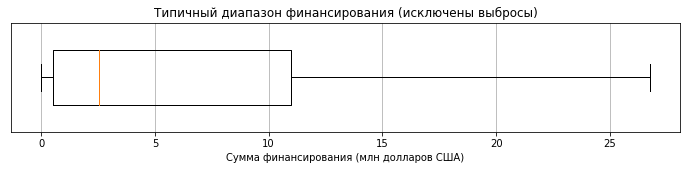

In [67]:
# Строим диаграмму размаха значений 
plt.figure(figsize=(12, 2))
plt.boxplot(funded, vert=False, showfliers=False, widths=0.5)
plt.title('Типичный диапазон финансирования (исключены выбросы)')
plt.xlabel('Сумма финансирования (млн долларов США)')
plt.yticks([])
plt.grid(axis='x')
plt.show()

Исходя из визуализаций, можно сделать вывод, что пик распределения приходится на левую сторону, а справа присутствует длинный "хвост", соответственно, чаще всего финансирование компаний составляет 0-0.1 млн долларов, затем наблюдается резкий спад значений. Медиана для ненулевых значений финансирования равна примерно 2.5 млн долларов.


### 3.3. Куплены забесплатно?



Для анализа компаний, купленных за 0 или 1 доллар, необходимо присоединить к датафрейму `company_filtred` датафрейм `acquisition`. Слева присоединим по полю `company_id_1`, справа по полю `acquired_company_id`. Будем использовать тип соединения `inner`. В результате получим датафрейм со всеми компаниями, которые были куплены.

Далее отфильтруем только те компании, у которых `price_amount` равно 0 или 1, а `funding_total` больше 0.

In [68]:
# Соединим два датафрейма
company_acquisition = company_filtred.merge(acquisition, left_on = 'company_id_1', right_on = 'acquired_company_id')

In [69]:
# Отфильтруем полученный датафрейм
condition = (((company_acquisition['price_amount'] == 0) | (company_acquisition['price_amount'] == 1))
                               & (company_acquisition['funding_total'] > 0))
company_acquisition_filtred = company_acquisition[condition].copy()

Исследуем распределение суммы финансирования для заданных компаний.

In [70]:
# Исследуем распределение суммы финансирования
company_acquisition_filtred['funding_total_m'].describe()

count    1618.000000
mean       18.152962
std       144.503027
min         0.003750
25%         2.000000
50%         6.000000
75%        15.500000
max      5700.000000
Name: funding_total_m, dtype: float64

Всего компаний, купленных за 0 или 1 доллар, и при этом получавших финансирование, 1618. 
- Медианное значение финансирования для таких компаний 6 млн долларов, среднее значение больше медианы в 3 раза и равно 18.1 млн. Это может означать, что в данных присутствуют выбросы. 
- Максимальное значение равно 5700 млн долларов, что также говорит о выбросах.
- Стандартное отклонение высокое и равно 144 млн, что говорит о большом разбросе данных.

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total_m` и укажем, каким процентилям границы соответствуют. Для этого вычислим квартили и IQR, определим границы выбросов и процентили этих границ.

In [71]:
# Вычисляем квартили и IQR
Q1 = company_acquisition_filtred['funding_total_m'].quantile(0.25)
Q3 = company_acquisition_filtred['funding_total_m'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов по правилу 1.5*IQR
lower_bound = max(0, Q1 - 1.5 * IQR)  # Не может быть отрицательным
upper_bound = Q3 + 1.5 * IQR

# Определяем процентили границ
lower_percentile = (company_acquisition_filtred['funding_total_m'] < lower_bound).mean() * 100
upper_percentile = (company_acquisition_filtred['funding_total_m'] > upper_bound).mean() * 100

print(f'Нижняя граница выбросов равна {lower_bound} млн долларов США, ее процентиль равен {lower_percentile}%')
print(f'Верхняя граница выбросов равна {upper_bound} млн долларов США, ее процентиль равен {round(upper_percentile, 3)}%')

Нижняя граница выбросов равна 0 млн долларов США, ее процентиль равен 0.0%
Верхняя граница выбросов равна 35.75 млн долларов США, ее процентиль равен 9.085%


- Нижняя граница выбросов равна 0 млн долларов США, ее процентиль равен 0.0%
- Верхняя граница выбросов равна 35.75 млн долларов США, ее процентиль равен 9.085%

Покупки стартапов за 0 или 1 доллар могут быть связаны с несколькими причинами:
- Покупка провального стартапа ради команды за символичесукю сумму. Это могут быть компании с минимальным финансированием.
- Перевод активов между юрлицами за минимальную сумму(1 доллар).
- Спасение компании от банкротства и покупка ее долгов за 0 долларов. Это могут быть  компаниии с максимальным финансированием, которые не оправдали ожиданий инвесторов.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- наибольшим разбросом цен за стартап.


Для того, чтобы найти категории стартапов с типично высокими ценами и наибольшим разбросом цен:
- Сгруппируем стартапы по категориям, для каждой категории найдем максимальную, минимальную и медианную цену покупки стартапа.
- Найдем значение разброса цен для каждой категории стартапа.
- Исключим категории с нулевым разбросом цен и нулевой медианной ценой, так как нас интересуют самые высокие значения этих параметров.

In [72]:
# Сгруппируем данные по категориям стартапов, найдем максимум, минимум и медиану цены покупки стартапа
stats = company_acquisition.groupby('category_code').agg(minimum = ('price_amount', 'min'), maximum = ('price_amount', 'max'),
                                                         median = ('price_amount', 'median')).reset_index().sort_values(ascending = False, by = 'median')

In [73]:
# Найдем значение разброса цен
stats['price_range'] = stats['maximum'] - stats['minimum']
# Отфильтруем полученную таблицу, убрав нулевые значения для median и price_range
filtered_stats = stats[
    (stats['median'] > 0) & 
    (stats['price_range'] > 0)
].sort_values(
    by='median', 
    ascending=False
)

# Выводим результат
filtered_stats

,category_code,minimum,maximum,median,price_range
18,manufacturing,0,4050000000,72000000.0,4050000000
30,real_estate,0,6850000000,50000000.0,6850000000
2,automotive,0,5200000000,43000000.0,5200000000
3,biotech,0,20000000000,13200000.0,20000000000
15,hospitality,0,2170000000,12500000.0,2170000000
11,finance,0,4400000000,600000.0,4400000000


Из запроса заказчика можно сделать вывод, что в первую очередь его интересует типичная цена продажи стартапа, поэтому сортировку провели именно по ней. В отфильтрованной таблице осталось 6 значений, которые в целом уже являются  топом, однако можно отметить, что типичная стоимость первых трех категорий стартапов значительно выше, чем стоимость последних трех категорий. Но также отметим, что для четвертой в списке категории разброс цен самый большой из всех представленных, и, поскольку заказчика также интересует этот параметр, четвертая категория тоже будет включена в топ.

In [74]:
# Топ-4 категории стартапов с типично высокими ценами покупки и наибольшим разбросом цен 
filtered_stats.reset_index(drop = True).head(4)

,category_code,minimum,maximum,median,price_range
0,manufacturing,0,4050000000,72000000.0,4050000000
1,real_estate,0,6850000000,50000000.0,6850000000
2,automotive,0,5200000000,43000000.0,5200000000
3,biotech,0,20000000000,13200000.0,20000000000


Среди стартапов по самым высоким типичным ценам продажи можно выделить `manufacturing`, `real_estate`, `automotive`. Последнее место занимает `biotech`, который, в свою очередь, имеет самый высокий разброс цен продажи.


### 3.5. Сколько раундов продержится стартап перед покупкой


Для анализа сгруппируем данные по статусу стартапа и найдем медиану и среднее значение столбца `funding_rounds`. Медиана покажет типичное значение количества раундов для каждого статуса стартапа. Затем построим график, который отображает среднее количество раундов финансирования для каждой группы стартапов.

In [75]:
# Найдем медиану и среднее значение столбца funding_rounds для каждого статуса стартапа
company_filtred.groupby('status')['funding_rounds'].agg(['median', 'mean'])

,median,mean
status,,
acquired,0.0,0.523526
closed,1.0,1.381453
ipo,1.0,1.934375
operating,1.0,1.522658


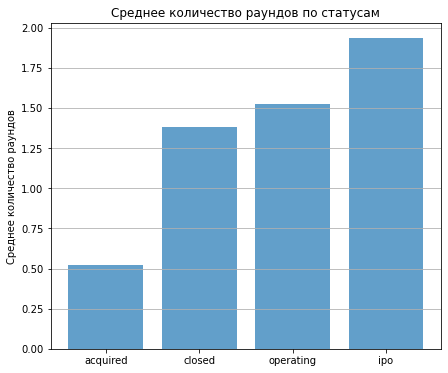

In [76]:
# Построим график, отображающий среднее количество раундов для всех статусов стартапов
sorted_stats = company_filtred.groupby('status')['funding_rounds'].agg(['median', 'mean']).sort_values('mean', ascending=True)
plt.figure(figsize = (7, 6))
plt.bar(
    sorted_stats.index,
    sorted_stats['mean'],
    alpha=0.7
)
plt.title('Среднее количество раундов по статусам')
plt.ylabel('Среднее количество раундов')
plt.grid(axis = 'y')

Из типичных значений количества раундов финансирования можно сделать вывод, что большинство купленных стартапов не привлекали инвестиции вообще. Закрытые, работащие и IPO компании чаще всего привлекали только один раунд инвестиций.

Из средних значений количества раундов финансирования можно сделать вывод, что меньше всего раундов у купленных компаний(0.5), это может говорить о том, что стартапы покупают на ранней стадии. 

Больше всего этапов финансирования в среднем у стартапов со статусом IPO(1.98). Для выхода на биржу обычно требуется больше раундов финансирования, поэтому логично, что такие стартапы имеют в среднем больше раундов, чем остальные. Однако, чаще всего стартапы, вышедшие на биржу имеют хотя бы 2-3 раунда финансирования, стартапы с только 1 раундом финансирования скорее редкость. Возможно, в данных есть неточности, или же за один раунд многими стартапами была получена очень большая сумма финансирования.


***Промежуточный вывод:***
- Датафрейм `company` был отфильтрован по заданным параметрам для дальнейшего анализа
- В результате анализа было обнаружено, что в данных о финансировании компаний присутствуют выбросы. Чаще всего финансирование компаний составляет 0-0.1 млн долларов, медиана для ненулевых значений финансирования равна примерно 2.5 млн долларов.
- Всего компаний, купленных за 0 или 1 доллар, и при этом получавших финансирование, 1618. В данных об этих компаниях также присутствуют выбросы в информации о финансировании.
- Среди стартапов по самым высоким типичным ценам продажи можно выделить `manufacturing`, `real_estate`, `automotive`. Последнее место занимает `biotech`, который, в свою очередь, имеет самый высокий разброс цен продажи.
- Из типичных значений количества раундов финансирования можно сделать вывод, что большинство купленных стартапов не привлекали инвестиции вообще. Закрытые, работащие и IPO компании чаще всего привлекали только один раунд инвестиций. 


## 4. Итоговый вывод и рекомендации


В ходе исследования были проанализированы данные о стартапах, их сотрудниках, финансировании и покупке одними компаниями других компаний. Необходимо было подготовить датасет и проверить, что данные в нем соответствуют здравому смыслу, а также ответить на вопросы заказчика.

- Исходя из днных, размер компании не влияет на полноту данных об образовании сотрудников. Больше всего пропусков в данных у компаний с 6-13 сотрудниками(52%), меньше всего у компаний с более, чем 14 сотрудниками(39%). Для 1 и 2-5 сотрудников значения примерно одинаковы.
- Датафрейм `company_and_rounds` для дальшейшего анализа был разделен на два датафрейма: `company` и `rounds`. Датафрейм `company` был соединен с `acquisition`.
- Покупки стартапов за 0 или 1 доллар могут быть связаны с несколькими причинами:
  - Покупка провального стартапа ради команды за символичесукю сумму. Это могут быть компании с минимальным финансированием.
  - Перевод активов между юрлицами за минимальную сумму(1 доллар).
  - Спасение компании от банкротства и покупка ее долгов за 0 долларов. Это могут быть  компаниии с максимальным финансированием, которые не оправдали ожиданий инвесторов.
- Среди стартапов по самым высоким типичным ценам продажи можно выделить `manufacturing`, `real_estate`, `automotive`. Последнее место занимает `biotech`, который, в свою очередь, имеет самый высокий разброс цен продажи.
- Исходя из типичных значений количества раундов финансирования, большинство купленных стартапов не привлекали инвестиции вообще. Закрытые, работащие и IPO компании чаще всего привлекали только один раунд инвестиций. Из средних значений количества раундов финансирования можно сделать вывод, что меньше всего раундов у купленных компаний(0.5), больше всего этапов финансирования в среднем у стартапов со статусом IPO(1.98). 

***Согласованность выводов***
- Подтверждают друг друга:
  - Низкое число раундов у закрытых стартапов подтверждает высокий риск провала на ранних этапах.
  - Связь между количеством раундов и статусом компании логична: IPO-компании привлекают больше инвестиций.
  - Малые компании (1–5 сотрудников) показывают схожий % пропусков в данных об образовании.

- Вызывают сомнения:
  - Низкое число раундов у IPO. Противоречит рыночной практике.
  - `biotech` с высоким разбросом, но не в топе по ценам. Возможно, в данных мало успешных кейсов.
  - Медиана 0 раундов у купленных стартапов может указывать на ошибки в данных.

***Рекомендации***
- Уточнить данные:
  - Проверить, как учитывались раунды.
  - Уточнить, какие типы сделок (M&A, acqui-hire) преобладают среди покупок за 0/1 доллар.

- Дополнительный анализ:
  - Изучить связь между суммой финансирования и ценой продажи.
  - Сравнить динамику по годам (например, влияние кризисов на количество раундов).
  - Провести более детальный анализ аномальных значений.